In [1]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from src.augment import ImageBatchProcessor
from src.crop import crop_images_from_folder
from src.model import model
from src.dataset import dataset
seed = 42
image_folder = 'dataset/train/images/'
label_folder = 'dataset/train/labels/'
target_image_folder = 'dataset/train/images_aug/'
target_label_folder = 'dataset/train/labels_aug/'

In [ ]:
processor = ImageBatchProcessor(image_folder=image_folder, label_folder=label_folder, target_image_folder=target_image_folder, target_label_folder=target_label_folder)
processor.augment_and_save(nb_augmentation=5)


In [ ]:
crop_images_from_folder(target_image_folder, target_label_folder, 'dataset/train/aug_cropped_images/')
crop_images_from_folder(image_folder, label_folder, 'dataset/train/cropped_images/')
val_path = 'dataset/val/images/'
val_label_path = 'dataset/val/labels/'
crop_images_from_folder(val_path, val_label_path, 'dataset/val/cropped_images/')

In [4]:
val_path = 'dataset/val/cropped_images/'
aug_train_path = 'dataset/train/aug_cropped_images/'
train_path = 'dataset/train/cropped_images/'
standard_size = (64, 64)
label_size_factor = 1

train_data = dataset(img_dir=train_path, augment_path=aug_train_path, label_size_factor=label_size_factor, standard_size=standard_size)
val_data = dataset(val_path, train=False, standard_size=standard_size)


Found 2390 images in dataset/train/aug_cropped_images/
Label ceder has 245 images
Label interdiction has 1025 images
Label frouge has 225 images
Label none has 0 images
Label fvert has 295 images
Label obligation has 95 images
Label danger has 295 images
Label forange has 145 images
Label stop has 65 images
Augmenting label ceder with 67 images, using 245 images
Skipping label interdiction as it already has enough images
Augmenting label frouge with 110 images, using 225 images
Skipping label none as it already has enough images
Augmenting label fvert with 91 images, using 295 images
Augmenting label obligation with 92 images, using 95 images
Augmenting label danger with 38 images, using 295 images
Augmenting label forange with 133 images, using 145 images
Augmenting label stop with 100 images, using 65 images


Preprocessing images: 100%|██████████| 2141/2141 [00:00<00:00, 2058217.94it/s]

Total loading time: 8.30 seconds



Preprocessing images: 100%|██████████| 170/170 [00:00<00:00, 1482394.35it/s]

Total loading time: 0.48 seconds


In [5]:
label_count = {}
for x in train_data.images:
    label = x.label
    if label in label_count.keys():
        label_count[label] +=1
    else:
        label_count[label] =1
label_count

{'ceder': 200,
 'frouge': 200,
 'none': 376,
 'fvert': 200,
 'obligation': 200,
 'danger': 200,
 'forange': 200,
 'stop': 200,
 'interdiction': 183}

In [6]:
max_iter = 10000
# initialize the model
my_model = model(seed)
#my_model.train_lr(train_data, verbose=1, max_iter=max_iter)
#my_model.grid_search_svm(train_data, verbose=2, max_iter=max_iter)
my_model.train_svm(train_data, verbose=0, max_iter=max_iter)
#my_model.train_OneVsRest(train_data, verbose=1, max_iter=max_iter)
#my_model.plot_learning_curve(train_data, verbose=1)
print(f"Model trained with {my_model.name} with seed {seed},max_iter {max_iter}, standard_size {standard_size}, label_size_factor {label_size_factor}")

Number of nan values in X: 0


/home/alexandre/.conda/envs/sy32/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy on test data: 0.9540816326530612
              precision    recall  f1-score   support

       ceder       0.97      0.97      0.97        36
      danger       0.95      0.97      0.96        38
     forange       0.97      0.94      0.96        35
      frouge       0.88      0.90      0.89        39
       fvert       0.96      0.98      0.97        48
interdiction       1.00      0.93      0.96        27
        none       0.95      0.95      0.95        79
  obligation       0.95      0.95      0.95        42
        stop       0.98      0.98      0.98        48

    accuracy                           0.95       392
   macro avg       0.96      0.95      0.95       392
weighted avg       0.95      0.95      0.95       392

Model trained with SVM with seed 42,max_iter 10000, standard_size (64, 64), label_size_factor 1


Accuracy on validation data: 0.8918918918918919
              precision    recall  f1-score   support

       ceder       0.89      1.00      0.94        16
      danger       1.00      1.00      1.00        19
     forange       0.83      0.83      0.83         6
      frouge       0.69      0.85      0.76        13
       fvert       0.40      1.00      0.57         2
interdiction       0.90      0.86      0.88        22
        none       1.00      0.78      0.87        40
  obligation       0.83      0.94      0.88        16
        stop       1.00      1.00      1.00        14

    accuracy                           0.89       148
   macro avg       0.84      0.92      0.86       148
weighted avg       0.91      0.89      0.90       148



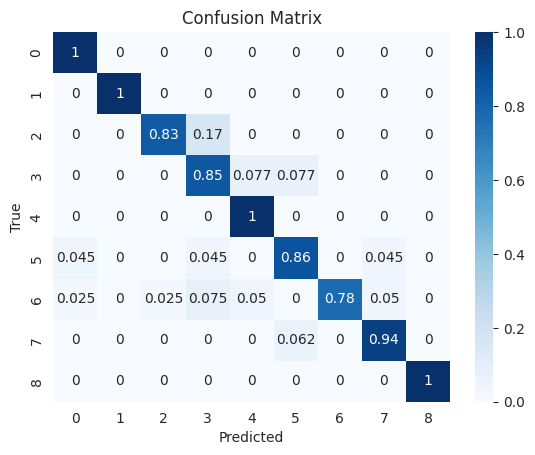

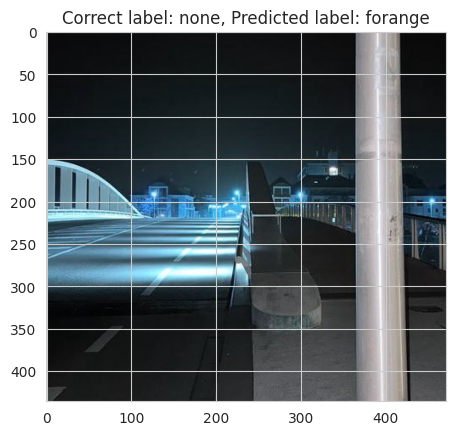

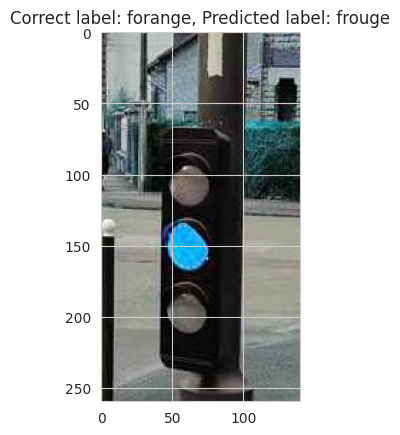

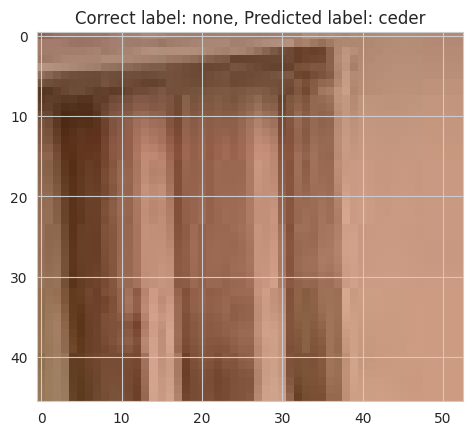

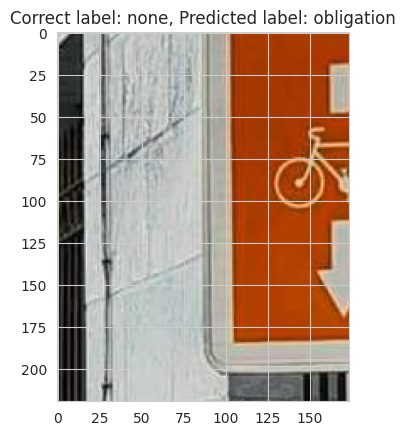

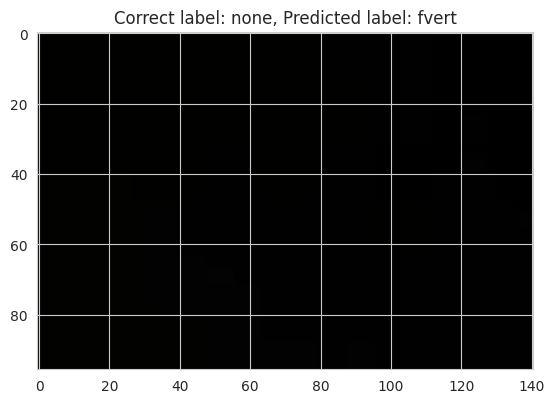

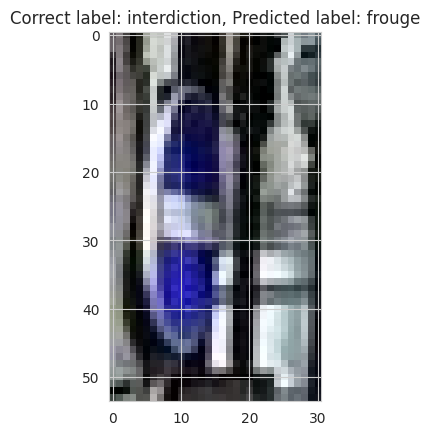

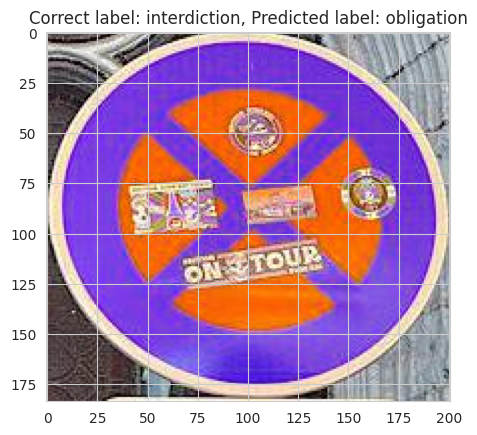

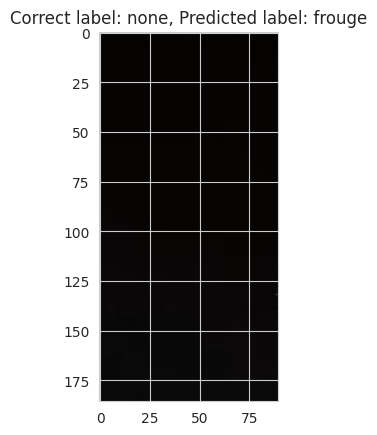

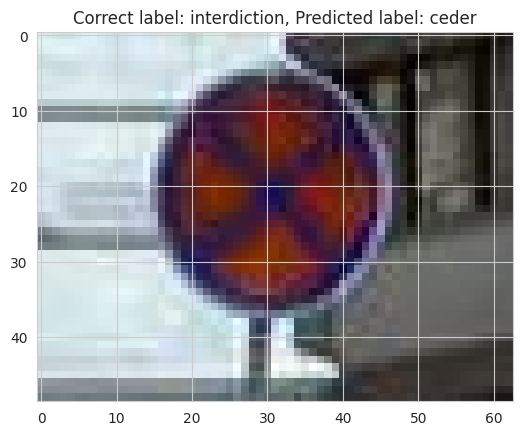

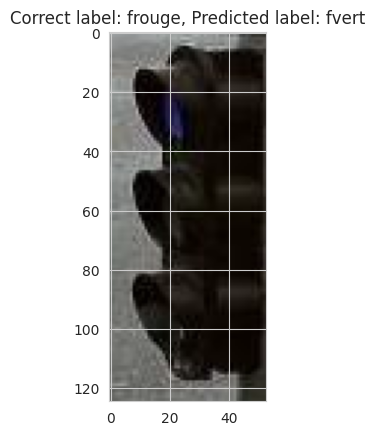

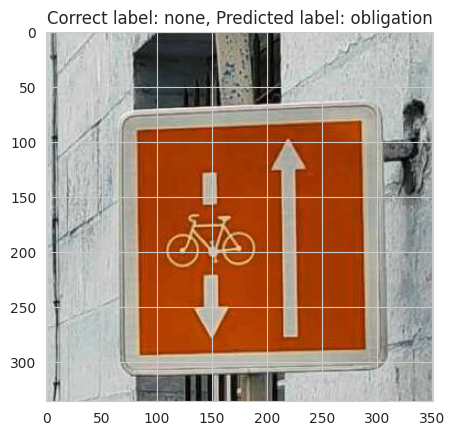

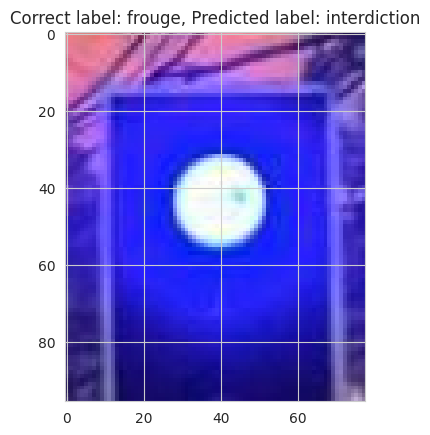

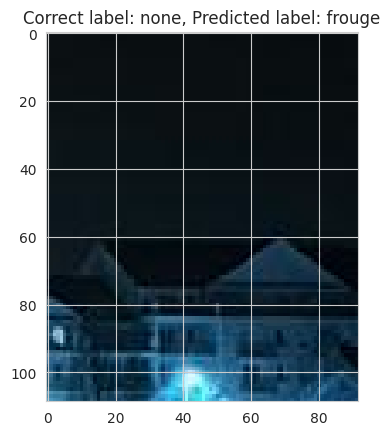

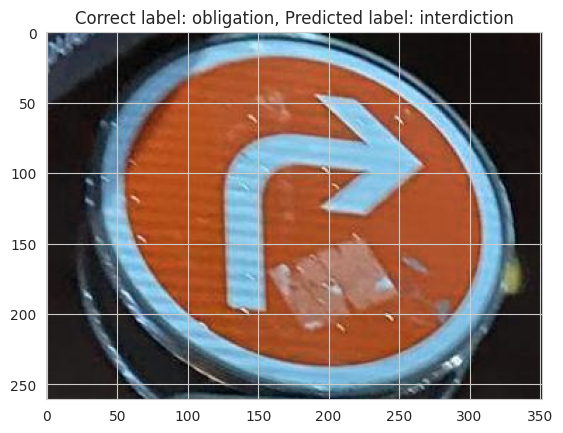

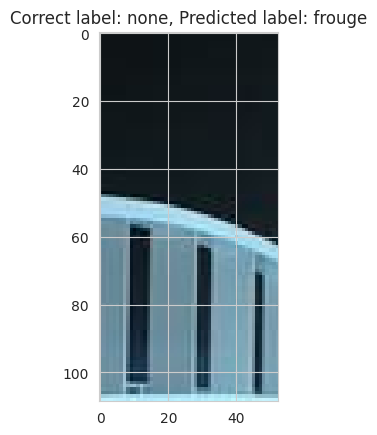

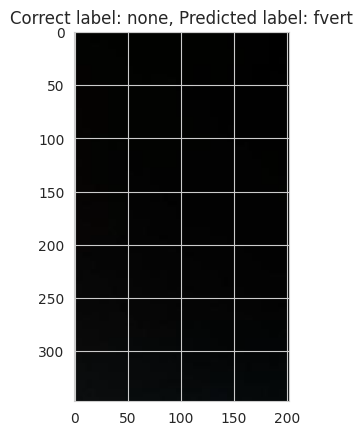

Model accuracy with SVM: 0.8918918918918919


In [7]:
accuracy = my_model.evaluate(val_data)
print("Model accuracy with SVM: {}".format(accuracy))


In [42]:
my_model.save("src/models")
